In [1]:
import os
os.chdir("..")

from load.helpers import parse_yaml
from graph.plot_helpers import load_simulation_for_all_sectors
from graph.plotting import plot_defaults, plot_cummulative_defaults, plot_effect_on_sectors_from_other_sectors, plot_pairwise_effect

config_dict = parse_yaml("config.yaml")

## Sector level analysis

## Model
parameters:
- distribution: pareto
- alpha: 0.7
- scale parameter: 0.1
- default threshold: 0.5
- number of simulations: 1000

In [2]:
sectors_dict = load_simulation_for_all_sectors(config_dict["outputs"]["simulations"], "2022_11_11_045044", config_dict["lists"]["sectors"])

In [8]:
df = sectors_dict['Information Technology'][100]

In [9]:
df[df.sector == "Utilities"]

,ticker,sector,industry,assets,liabilities,equity,label,default_round,equity_orig
9,VST,Utilities,Independent Power and Renewable Electricity Pr...,2.459713e+07,21392000.0,3.205129e+06,vistra,2.0,8291000.0
223,EVRG,Utilities,Electric Utilities,2.231456e+07,19276100.0,3.038458e+06,evergy,7.0,9244400.0
224,EXC,Utilities,Electric Utilities,1.154334e+08,98620000.0,1.681335e+07,exelon,7.0,34393000.0
227,FE,Utilities,Electric Utilities,4.108720e+07,36757000.0,4.330197e+06,firstenergy,6.0,8675000.0
245,NI,Utilities,Multi-Utilities,1.936941e+07,17209600.0,2.159813e+06,nisource,7.0,6947300.0
255,PPL,Utilities,Electric Utilities,2.520006e+07,19500000.0,5.700062e+06,ppl,7.0,13723000.0
382,UGI,Utilities,Gas Utilities,1.368583e+07,11201000.0,2.484825e+06,ugi,7.0,5522000.0
633,IDA,Utilities,Electric Utilities,5.391267e+06,4542079.0,8.491876e+05,idacorp,7.0,2668436.0
810,NWE,Utilities,Multi-Utilities,5.469771e+06,4440730.0,1.029041e+06,northwestern,7.0,2339713.0
863,ETR,Utilities,Electric Utilities,5.164315e+07,47529438.0,4.113714e+06,entergy,7.0,11924804.0


In [ ]:
fig = plot_defaults(sectors_dict, "all", 'rounds')

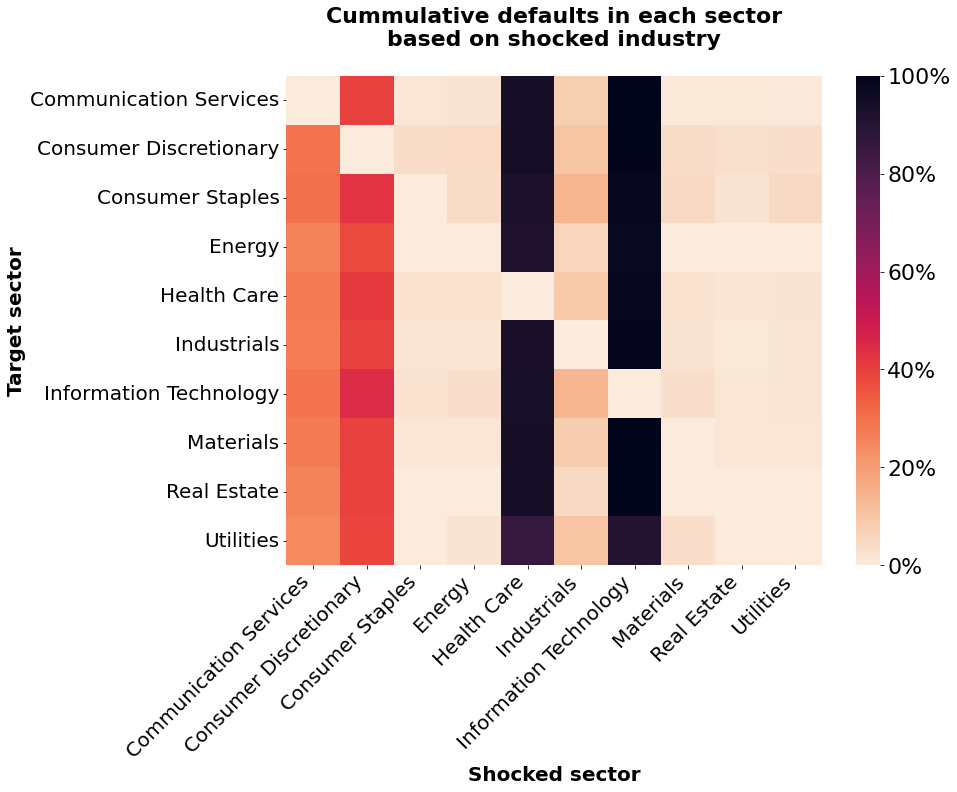

In [3]:
fig = plot_pairwise_effect(sectors_dict, include_self=False)

In [5]:
fig.savefig(f"{config_dict['outputs']['plots']}heatmap_lambda07_h05.png", bbox_inches='tight',dpi=600)

In [ ]:
fig.savefig(f"{config_dict['outputs']['plots']}cummdef_lambda07_h05.png", bbox_inches='tight',dpi=600)

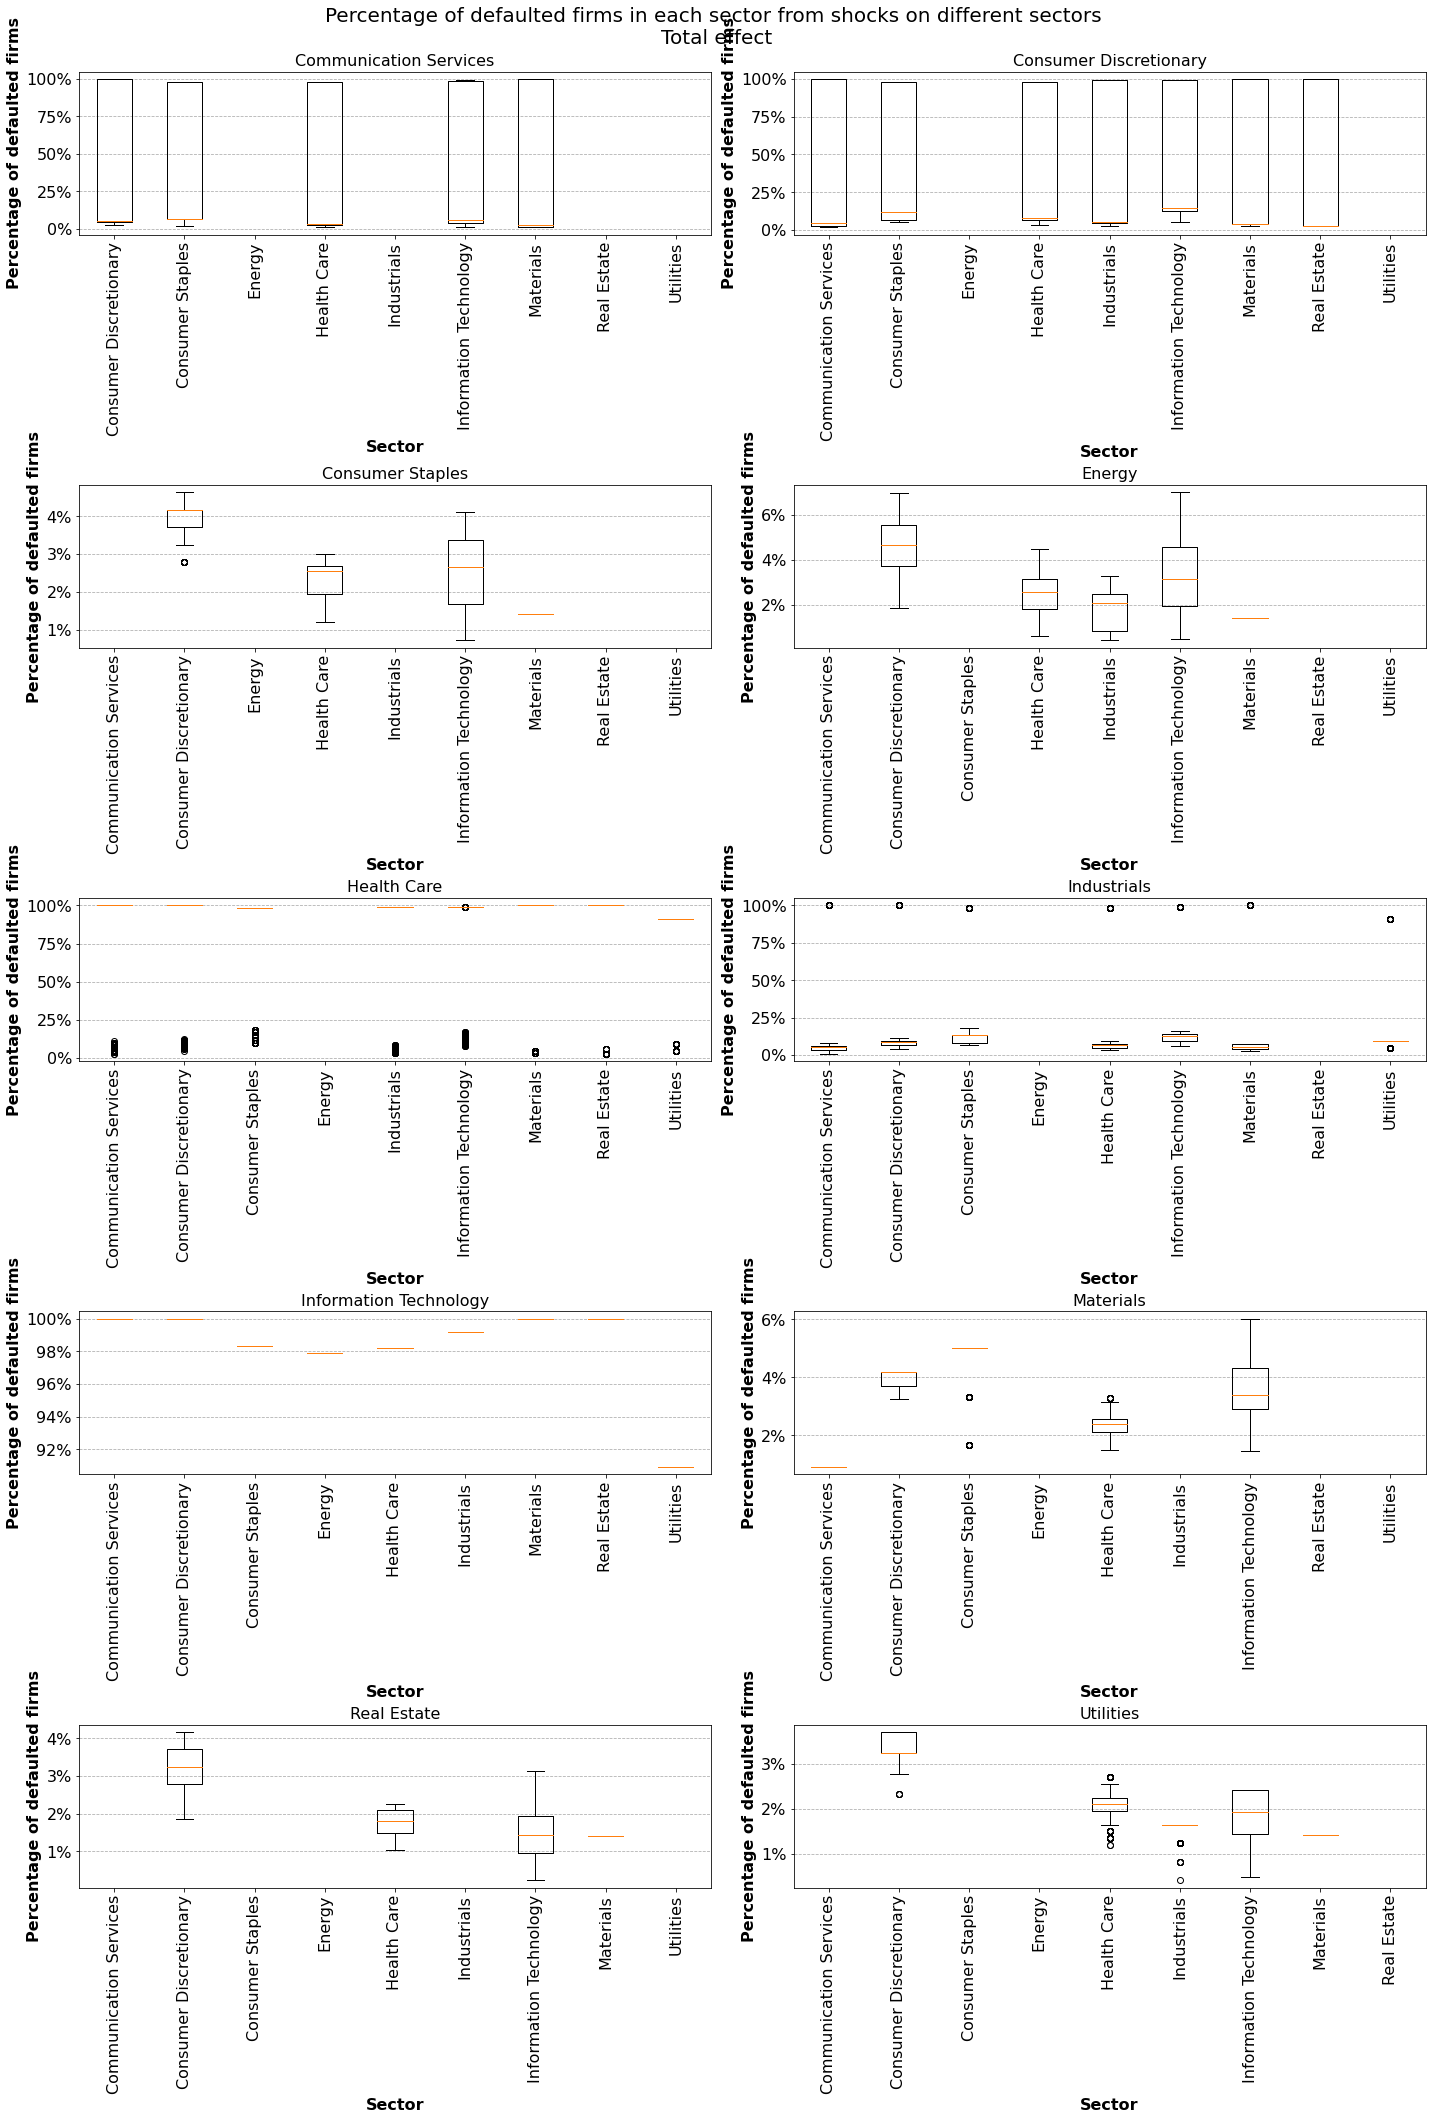

In [4]:
fig = plot_defaults(sectors_dict, "all", 'sectors_total')

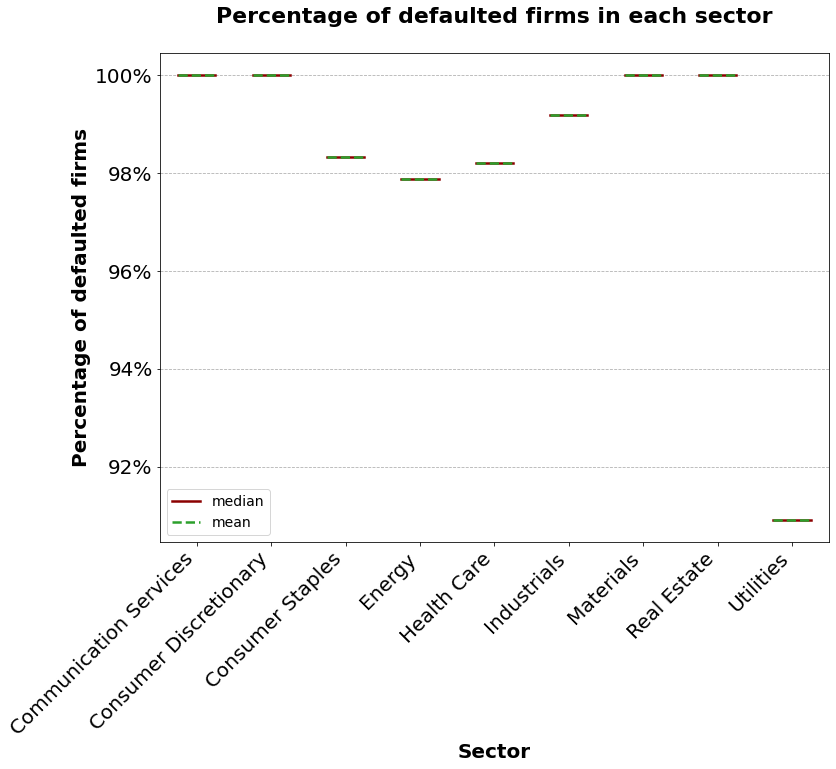

In [3]:
fig = plot_defaults(sectors_dict, "Information Technology", 'sectors_total')

In [4]:
fig.savefig(f"{config_dict['outputs']['plots']}boxplot_IT_lambda07_h05.png", bbox_inches='tight',dpi=600)

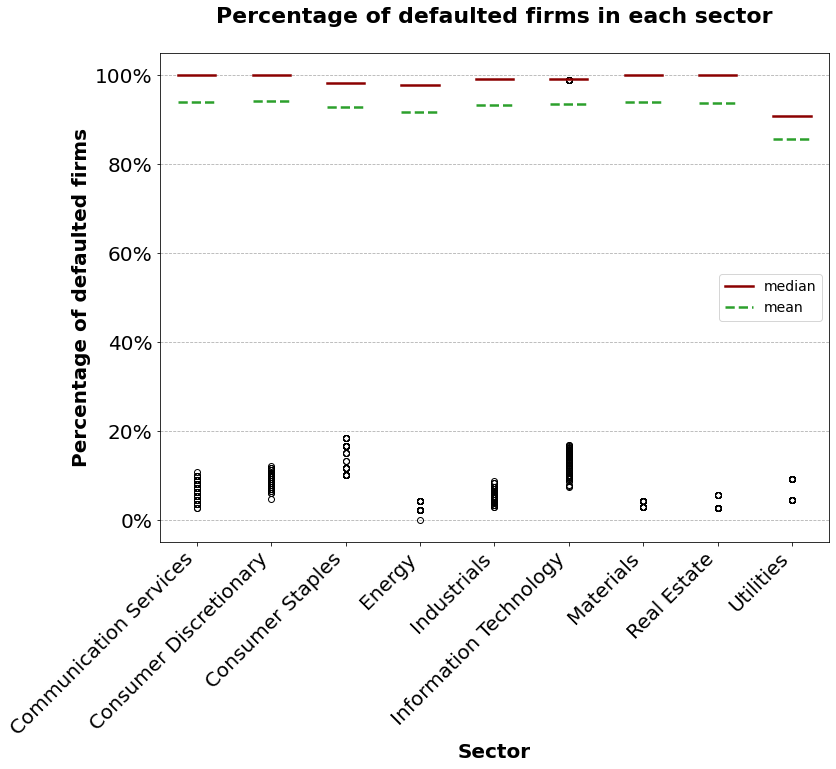

In [5]:
fig = plot_defaults(sectors_dict, "Health Care", 'sectors_total')

In [6]:
fig.savefig(f"{config_dict['outputs']['plots']}boxplot_HC_lambda07_h05.png", bbox_inches='tight',dpi=600)

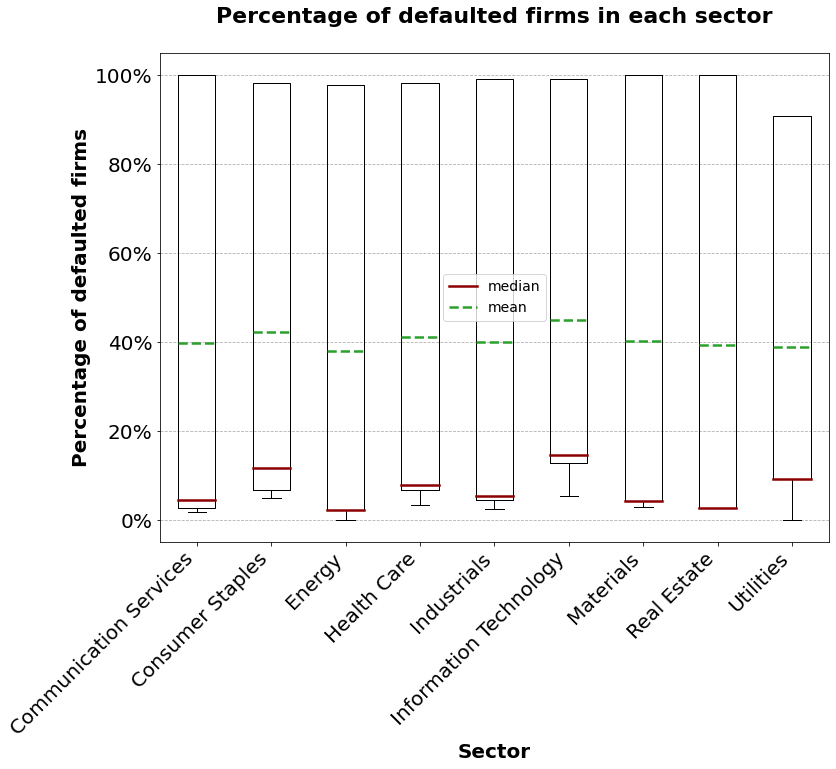

In [8]:
fig = plot_defaults(sectors_dict, "Consumer Discretionary", 'sectors_total')

In [9]:
fig.savefig(f"{config_dict['outputs']['plots']}boxplot_CD_lambda07_h05.png", bbox_inches='tight',dpi=600)

In [ ]:
fig = plot_defaults(sectors_dict, "all", 'sectors_direct')

In [ ]:
fig = plot_effect_on_sectors_from_other_sectors(sectors_dict)

In [107]:
fig.savefig(f"{config_dict['outputs']['plots']}boxplot_effect_total_demo.png", bbox_inches='tight',dpi=600)

In [48]:
import pandas as pd
import numpy as np

def count_defaults_each_round(df_list, sector, percent=False) -> pd.DataFrame:
    """
    Helper function that creates a dataframe with the defaulted firms in each round.
    The rows of the dictionary are the realizations while the columns represent
    each default round.
    """

    result_list = []
    for df in df_list:
        result_dict = {}
        res = df[~pd.isna(df.default_round) & (df.sector == sector)].groupby("default_round").count()["label"]
        for i in range(0, len(res)):

            result_dict[res.index[i]] = res.iloc[i]
        result_list.append(result_dict)

    result_df = pd.DataFrame.from_records(result_list).fillna(0)

    if percent:
        result_df = result_df / len(df_list[0]["label"]) * 100

    return result_df


def calculate_cummulative_defaults(sectors_dict):
    """
    Helper function that counts the cummulative defaults in each round for each
    shocked sector.
    """
    plot_dict = {}
    for (sec, df_list) in sectors_dict.items():

        defaulted_df = count_defaults_each_round(df_list)

        # calculating cummulative sum of defaults
        cumsum_df = defaulted_df.cumsum(axis=1)
        # expressing cummulative defaults as percentage of total nodes
        no_nodes = len(df_list[0]["label"])
        cumsum_df = cumsum_df / no_nodes * 100
        # calculating the mean of each cummulative sum value
        plot_dict[sec] = cumsum_df.mean(axis=0).to_dict()

    # calculating highest default round
    len_longest_list = len(max(plot_dict.values(), key=lambda x: len(x)))

    # adding zeros to rounds where there were no defaults to have all lists
    # with the same length
    for def_dict in plot_dict.values():

        for round in range(len(def_dict), len_longest_list):
            def_dict[round + 1] = def_dict[sorted(def_dict.keys())[-1]]

    return plot_dict

In [102]:
sector = "Health Care"

In [103]:
own = count_defaults_each_round(sectors_dict[sector], sector)

In [104]:
own_1 = list(own.mean(axis='index'))[0]

In [105]:
res_dict = {}
for s in list(set(config_dict["lists"]["sectors"]) - set([sector])):
    df = count_defaults_each_round(sectors_dict[s], sector)
    
    try:
        max_value = list(df.cumsum(axis=1).mean())[-1]
    except Exception:
        max_value = 0
    res_dict[s] = max_value

In [86]:
np.mean(list(res_dict.values()))

7.1777999999999995

In [99]:
set(config_dict["lists"]["sectors"]) - set([sector])

{'Communication Services',
 'Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate'}

In [98]:
set([sector])

{'Utilities'}

In [70]:
import matplotlib.pyplot as plt

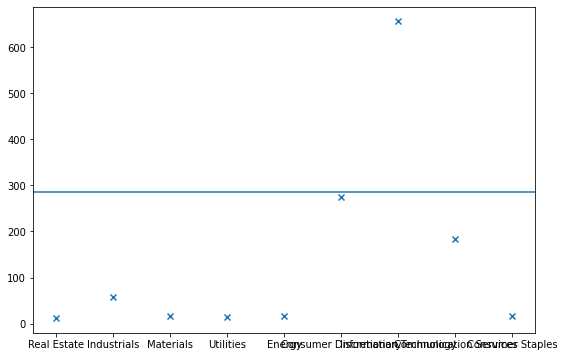

In [106]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(x=list(res_dict.keys()), y=list(res_dict.values()), marker='x')
ax.axhline(y=own_1)